## 실습 01

### 01. yelp_business.csv 의 데이터 셋의 결측치 비율을 확인해 보자.
<pre>
sapply(df, function(df) {
   ..
}
</pre>

In [88]:
df <- read.csv("data/yelp_business.csv", na.string=c("NA", ""), stringsAsFactors=F)
dfp1 <- read.csv("data/yelp_business_part1.csv", na.string=c("NA", ""), stringsAsFactors=F)

In [89]:
df_b <- df
dim(df)
dim(dfp1)

[1] 174567     13

[1] 7591   13

In [90]:
colnames(df)

[1] "business_id"  "name"         "neighborhood" "address"      "city"        
 [6] "state"        "postal_code"  "latitude"     "longitude"    "stars"       
[11] "review_count" "is_open"      "categories"

business_id         name neighborhood      address         city        state 
0.000000e+00 0.000000e+00 6.103788e-01 0.000000e+00 5.728460e-06 5.728460e-06 
 postal_code     latitude    longitude        stars review_count      is_open 
3.568830e-03 5.728460e-06 5.728460e-06 0.000000e+00 0.000000e+00 0.000000e+00 
  categories 
0.000000e+00

In [92]:
summary(df)

 business_id            name           neighborhood         address         
 Length:174567      Length:174567      Length:174567      Length:174567     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
     city              state           postal_code           latitude     
 Length:174567      Length:174567      Length:174567      Min.   :-36.09  
 Class :character   Class :character   Class :character   1st Qu.: 33.63  
 Mode  :character   Mode  :character   Mode  :character   Median : 36.14  
                                                          Mean   : 38.63  
         

## 02. Amelia를 이용하여 결측치 확인해 보자.

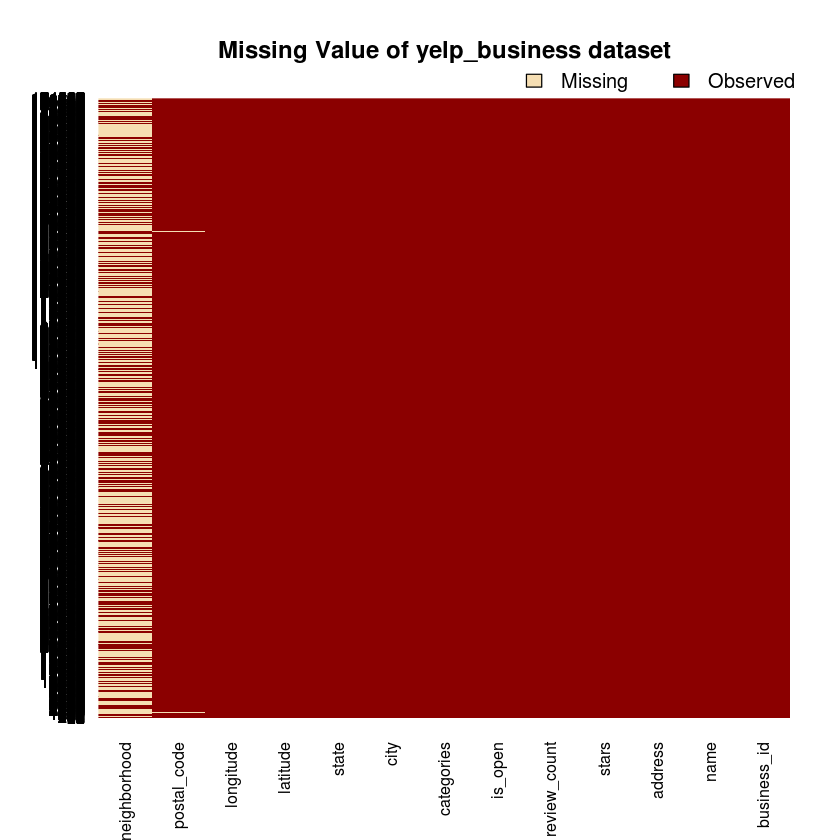

## 03. 누락된 값을 채워보자.(imputing missing value) - state, city

In [94]:
sapply(df, function(df) {
    sum(is.na(df)==TRUE)
})

business_id         name neighborhood      address         city        state 
           0            0       106552            0            1            1 
 postal_code     latitude    longitude        stars review_count      is_open 
         623            1            1            0            0            0 
  categories 
           0

<pre>
neighborhood와 city, state, postal_code, latitude, longitude가 결측치로 확인된다.
</pre>

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
146525,Cr3LJ2sKGNKEYIAjmG7aCA,"""Lululemon Athletica""",New Town,"""57 George Street""",NA,EDH,EH2 2JG,55.95334,-3.199333,4,5,1,Sporting Goods;Fashion;Sports Wear;Shopping


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
52816,SLqpLeF3gq6nnx6_JoE7-A,"""5150 Wraps""",NA,"""250 Sunpac Ave, Ste 250, Ste A6 130""",Henderson Nevada,NA,89015,36.06952,-114.9963,5,12,1,Auto Customization;Vehicle Wraps;Automotive;Auto Glass Services


In [97]:
table(df$state)


   01     3    30     6    AB   ABE    AK    AL    AR    AZ     B    BW    BY 
   10     1     1     3     1     3     1     1     2 52214     1  3118     4 
    C    CA   CHE   CMA    CO    CS    DE   EDH   ELN   ESX   FAL   FIF    FL 
   28     5   143     2     2     1     1  3795    47    12     1    85     1 
  FLN    GA   GLG   HLD    HU    IL    IN   KHL    KY   MLN    MN    MT    NC 
    2     1     3   179     1  1852     3     1     1   208     1     1 12956 
   NE    NI   NLK   NTH    NV    NY   NYK    OH    ON    PA   PKN    QC   RCC 
    1    10     1     2 33086    18   152 12609 30208 10109     1  8169     1 
   SC   SCB    SL    ST   STG   TAM    VA    VS    VT    WA   WHT    WI   WLN 
  679     5     1    11     1     1     1     7     2     1     1  4754    38 
  XGL   ZET 
    4     1 

### 3-1 state 채우기

In [98]:
df[is.na(df$state),c('city', 'state')]

,city,state
52816,Henderson Nevada,NA


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
52816,SLqpLeF3gq6nnx6_JoE7-A,"""5150 Wraps""",NA,"""250 Sunpac Ave, Ste 250, Ste A6 130""",Henderson Nevada,NV,89015,36.06952,-114.9963,5,12,1,Auto Customization;Vehicle Wraps;Automotive;Auto Glass Services


### 3-2 city 채우기

In [100]:
table(df$city)


                                     110 Las Vegas 
                                                 1 
                                         AGINCOURT 
                                                 1 
                                          Aberdour 
                                                 1 
                                          Aberlady 
                                                 2 
                                        Ahwahtukee 
                                                 1 
                                         Ahwatukee 
                                                16 
                       Ahwatukee Foothills Village 
                                                 1 
                                          Aichwald 
                                                 2 
                                              Ajax 
                                               252 
                                            Alburg 
           

<img src="img/missingValue01.png">

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
146525,Cr3LJ2sKGNKEYIAjmG7aCA,"""Lululemon Athletica""",New Town,"""57 George Street""",NA,EDH,EH2 2JG,55.95334,-3.199333,4,5,1,Sporting Goods;Fashion;Sports Wear;Shopping


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
146525,Cr3LJ2sKGNKEYIAjmG7aCA,"""Lululemon Athletica""",New Town,"""57 George Street""",Edinburgh,EDH,EH2 2JG,55.95334,-3.199333,4,5,1,Sporting Goods;Fashion;Sports Wear;Shopping


In [103]:
sapply(df, function(df) {
    sum(is.na(df)==TRUE)
})

business_id         name neighborhood      address         city        state 
           0            0       106552            0            0            0 
 postal_code     latitude    longitude        stars review_count      is_open 
         623            1            1            0            0            0 
  categories 
           0

In [104]:
head(df,100)

business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NA,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.33069,-111.97860,4.0,22,1,Dentists;General Dentistry;Health & Medical;Oral Surgeons;Cosmetic Dentists;Orthodontists
He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NA,"""3101 Washington Rd""",McMurray,PA,15317,40.29169,-80.10490,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Blow Dry/Out Services;Hair Extensions;Beauty & Spas
KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NA,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.52490,-112.11531,1.5,18,1,Departments of Motor Vehicles;Public Services & Government
8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NA,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.38315,-111.96473,3.0,9,0,Sporting Goods;Shopping
PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NA,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.11953,-81.47569,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;American (Traditional);Burgers;Restaurants
o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NA,"""Richterstr. 11""",Stuttgart,BW,70567,48.72720,9.14795,4.0,5,1,Italian;Restaurants
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.20743,-115.26846,4.0,5,1,Real Estate Services;Real Estate;Home Services;Property Management
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NA,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.19748,-115.24966,1.5,9,1,Shopping;Sporting Goods
EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NA,"""2612 Brandt School Rd""",Wexford,PA,15090,40.61510,-80.09135,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NA,"""""",Henderson,NV,89014,36.05583,-115.04635,5.0,7,1,Automotive;Auto Detailing


## 04. categories 분류
<pre>
categories 는 다양한 분류로 되어 있다. 
;를 이용하여 항목을 분류를 수행해 보자. 몇가지 분류로 나누어지는가?
</pre>

In [106]:
head(df$categories)
is(df$categories)

[1] "Dentists;General Dentistry;Health & Medical;Oral Surgeons;Cosmetic Dentists;Orthodontists"      
[2] "Hair Stylists;Hair Salons;Men's Hair Salons;Blow Dry/Out Services;Hair Extensions;Beauty & Spas"
[3] "Departments of Motor Vehicles;Public Services & Government"                                     
[4] "Sporting Goods;Shopping"                                                                        
[5] "American (New);Nightlife;Bars;Sandwiches;American (Traditional);Burgers;Restaurants"            
[6] "Italian;Restaurants"

[1] "character"           "vector"              "data.frameRowLabels"
[4] "SuperClassMethod"

In [121]:
dfc2 = unlist(dfcatlist)
length(dfc2)

[1] 668027

In [129]:
print(length(table(dfc2)))
dfc_cnt = table(dfc2)

[1] 1294


In [130]:
## 정렬을 하여 나타내 보자.



dfc2
                        Restaurants                            Shopping 
                              54618                               27971 
                               Food                       Beauty & Spas 
                              24777                               17014 
                      Home Services                    Health & Medical 
                              16205                               14230 
                          Nightlife                      Local Services 
                              12154                               11232 
                         Automotive                                Bars 
                              11052                               10563 
          Event Planning & Services                         Active Life 
                               9078                                8257 
                            Fashion                          Sandwiches 
                               7019           